In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\pythonprograms\\udemy_courses.csv") # Importing the dataset
df
#df.sample(5) #previewing dataset randomly

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195,24481,2347,174,All Levels,0.37,10.000000,2016-01-21T01:38:48Z,Business Finance
1,97338.0,Forex Basics,https://www.udemy.com/forex-basics/,0,22344,712,26,All Levels,0.89,3.500000,2013-10-16T17:40:23Z,Business Finance
2,321410.0,Beginner to Pro in Excel: Financial Modeling a...,https://www.udemy.com/beginner-to-pro-in-excel...,195,22257,2697,138,Intermediate Level,0.13,7.500000,2014-11-25T23:00:40Z,Business Finance
3,301442.0,Black Algo Trading: Build Your Trading Robot,https://www.udemy.com/build-your-trading-robot/,200,20195,1113,227,All Levels,0.21,16.000000,2014-10-27T22:01:36Z,Business Finance
4,189160.0,Financial Analysis: A Recipe for Success,https://www.udemy.com/financial-analysis-a-rec...,0,19614,635,14,All Levels,0.30,1.500000,2014-04-23T15:10:52Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
119,1131122.0,IPO Fundamentals,https://www.udemy.com/ipo-fundamentals-basics-...,20,1122,13,6,All Levels,0.15,1.000000,2017-03-02T00:58:36Z,Business Finance
120,1194426.0,The Binary Institute - Introductory Course in ...,https://www.udemy.com/the-binary-institute-int...,0,1121,12,6,Beginner Level,0.30,1.000000,2017-04-27T23:49:48Z,Business Finance
121,821108.0,المحاسبة للإداريين و غير المحاسبين,https://www.udemy.com/accounting-for-non-accou...,20,9,3,17,Intermediate Level,0.88,0.716667,2016-04-23T22:57:42Z,Business Finance
122,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50,0,0,9,All Levels,0.15,2.000000,2017-06-29T23:20:10Z,Business Finance


In [66]:
df.sample(5) #previewing dataset randomly

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
103,936328.0,Learn to Trade Forex and Stocks: From Beginner...,https://www.udemy.com/tradeforex/,200,1645,25,42,All Levels,0.39,2.0,2016-09-07T20:33:30Z,Business Finance
62,502240.0,"Value Investing, Taught by Six Superinvestors",https://www.udemy.com/investing-stars/,200,3804,267,66,All Levels,0.96,5.0,2015-06-19T21:22:17Z,Business Finance
109,476256.0,Stock Options Trades Using Interactive Brokers,https://www.udemy.com/stock-options-trades-usi...,95,1580,26,14,All Levels,0.22,1.0,2015-09-07T20:21:39Z,Business Finance
69,86558.0,The Art Of Financial Valuation With Certificate,https://www.udemy.com/learn-how-to-think-like-...,20,3372,12,12,All Levels,0.96,2.0,2013-09-29T23:52:54Z,Business Finance
48,512400.0,EFT for Stock Options Trading Success & Making...,https://www.udemy.com/eft-for-stock-option-tra...,95,4530,13,31,All Levels,0.59,1.5,2015-08-06T19:08:20Z,Business Finance


In [67]:
print(df.shape) # view the dataset shape
print(df['level'].value_counts()) 

(124, 12)
All Levels            71
Beginner Level        34
Intermediate Level    18
Expert Level           1
Name: level, dtype: int64


In [69]:
#Here we print the shape of the dataset 
new_df = df[df['level']=='All Levels'] # in this new dataset we only take 'Volkswagen' Cars
print(new_df.shape) # Viewing the new dataset shape
print(new_df.isnull().sum()) # Is there any Null or Empty cell presents
new_df = new_df.dropna() # Deleting the rows which have Empty cells
print(new_df.shape) # After deletion Vewing the shape
print(new_df.isnull().sum()) #Is there any Null or Empty cell presents
new_df.sample(2) # Checking the random dataset sample

(71, 12)
course_id              1
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64
(70, 12)
course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
49,489146.0,Practical Finance,https://www.udemy.com/practical-finance/,20,4497,281,11,All Levels,0.80,1.0,2015-07-14T18:14:16Z,Business Finance
123,1232282.0,The Cash Flow Statement - An Introduction,https://www.udemy.com/cash-flow-statement-intr...,50,0,0,10,All Levels,0.18,1.5,2017-06-28T16:05:51Z,Business Finance


In [74]:
##Here we select only ‘ALL levels’ levels from the large dataset. Because different types oflevels have different brand price value rating value. So we take only one level for better prediction.

#here price is dependent variable and rating,num_likes,num_reviews all are indpendent ,considering price and num_Reviews
df5 = df[['price','num_reviews']] 
df5.sample(10)

,price,num_reviews
107,20,137
20,95,340
9,60,273
42,50,17
17,185,713
4,0,635
71,150,19
104,40,18
86,0,83
18,195,118


In [75]:
X = np.array(new_df[['price']]) # Storing into X the 'price' as np.array
y = np.array(new_df[['num_reviews']]) # Storing into y the 'num_reviews' as np.array
print(X.shape) # Vewing the shape of X
print(y.shape)

(70, 1)
(70, 1)


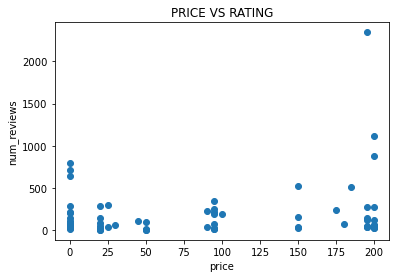

In [76]:
plt.scatter(X,y) # Plot a graph X vs y
plt.title('PRICE VS RATING')
plt.xlabel('price')
plt.ylabel('num_reviews')
plt.show()

In [77]:
#Here we plot a scatter plot graph between ‘job_title’ and ‘salary’. After viewing this graph we ensured that we can perform a linear regression for prediction.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15) # Spliting into train & test dataset
regressor = LinearRegression() # Creating a regressior
regressor.fit(X_train,y_train) # Fiting the dataset into the mode

LinearRegression()

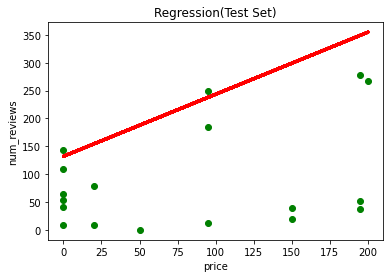

In [79]:
#Here we split our ‘X’ and ‘y’ dataset into ‘X_train’, ‘X_test’ and ‘y_train’, ‘y_test’. Here we take 25% data as test dataset and remaining as train dataset. We take the random_state value as 15 for our better prediction. We create regressor. And we fit the X_train and y_train into the regressor model.
plt.scatter(X_test,y_test,color="green") # Plot a graph with X_test vs y_test
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(Test Set)')
plt.xlabel('price')
plt.ylabel('num_reviews')
plt.show()

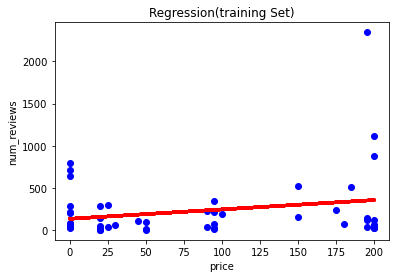

In [80]:
#Here we plot a scatter plot graph between X_test and y_test datasets and we draw a regression line.
plt.scatter(X_train,y_train,color="blue")  # Plot a graph with X_train vs y_train
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressior line showing
plt.title('Regression(training Set)')
plt.xlabel('price')
plt.ylabel('num_reviews')
plt.show()

In [81]:
#Here we plot the final X_train vs y_train scatterplot graph with a best-fit regression line. Here we can clearly understand the regression line.
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) # Priniting R2 Score
print('Mean squared Error :',mean_squared_error(y_test,y_pred)) # Priniting the mean error

R2 score: -2.35
Mean squared Error : 27467.695456287576
